In [1]:
import numpy as np

def p(x):
    return np.exp(-(x**2) / 2) / (np.sqrt(2*np.pi))

def p_inv(y):
    return np.sqrt(-2 * np.log(y * np.sqrt(2*np.pi)))

Here’s the algorithm for Standard Normal case (mu = 0, sigma = 1):

Set a starting point x

Sample the height u ~ Unif(0, p(x))

Sample the next x ~ Unif(-z, z), where z is the inverse PDF evaluated at u

Go to step 2

In [9]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt


sns.set()
mu = 65
sigma = 32


def p(x):
    return st.norm.pdf(x, loc=mu, scale=sigma)


def p_inv(y):
    x = np.sqrt(-2*sigma**2 * np.log(y * sigma * np.sqrt(2*np.pi)))
    return mu-x, mu+x


def slice_sampling(iter=1000):
    samples = np.zeros(iter)
    x = 0

    for i in range(iter):
        u = np.random.uniform(0, p(x))
        x_lo, x_hi = p_inv(u)
        x = np.random.uniform(x_lo, x_hi)
        samples[i] = x

    return samples

<IPython.core.display.Javascript object>


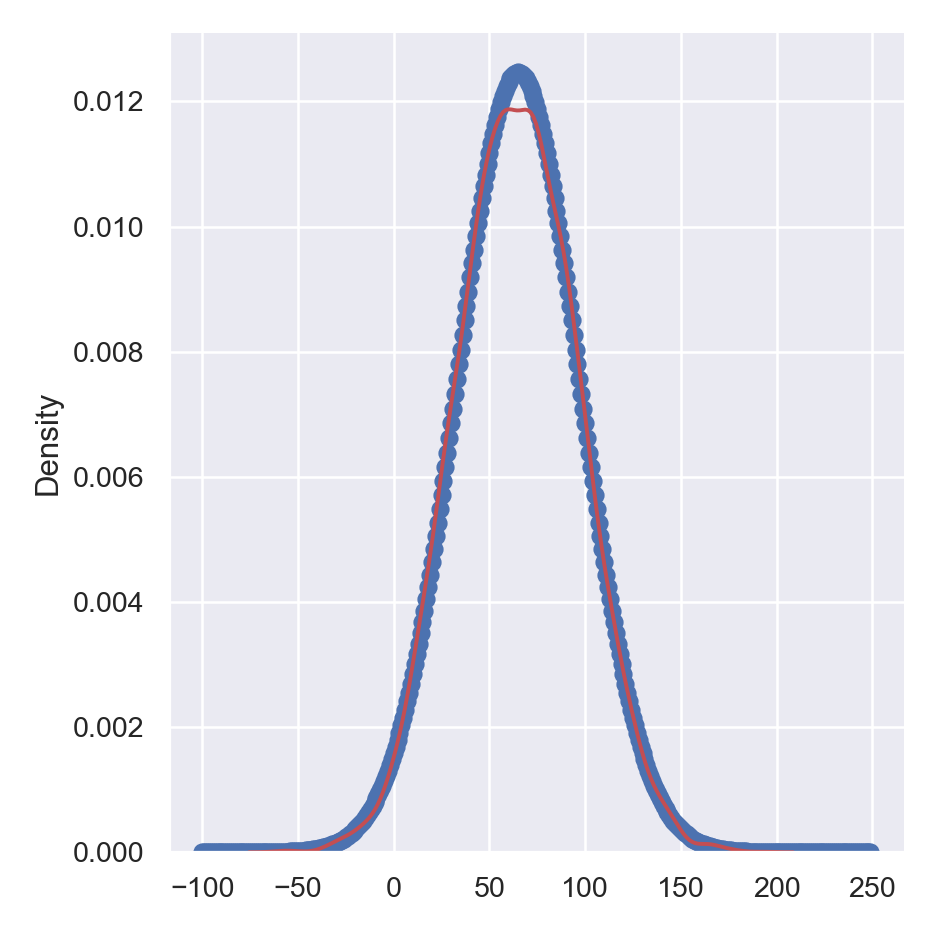

In [13]:
if __name__ == '__main__':
    samples = slice_sampling(iter=10000)
    sns.displot(samples, kind='kde', color='r')
    x = np.arange(-100, 250)
    plt.scatter(x, p(x))
    plt.show()